# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
from english_text_normalization import text_normalization
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42)

# Ignore Warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Corpus = open('English Quotes.txt').read().lower().split("\n")
Corpus = [text_normalization(text) for text in Corpus] 

# Preprocessing Data For Deep Learning Model

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Corpus)
all_words = len(tokenizer.word_index) + 1
all_words

7157

# Generate Input Sequences

In [5]:
input_sequence_ = []
for line in Corpus:
    token = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length =  max([len(x) for x in input_sequence_])
input_sequence_ = np.array(tf.keras.utils.pad_sequences(input_sequence_, maxlen= max_length, padding='pre'))

# Generate Train And Label Data For Model

In [6]:
train, label = input_sequence_[:,:-1], input_sequence_[:,-1]

# Convert Label Data

In [7]:
label = tf.keras.utils.to_categorical(label, num_classes=all_words)

# Deep Learning Models

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=3,
    mode = 'max',
    restore_best_weights=True,
)

**1-LSTM**

In [9]:
LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.LSTM(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])     

In [10]:
LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [11]:
with tf.device('gpu:0'):
    history = LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
2060/2060 [==============================] - 58s 27ms/step - loss: 6.3747 - accuracy: 0.0724
Epoch 2/150
2060/2060 [==============================] - 55s 27ms/step - loss: 5.5736 - accuracy: 0.1446
Epoch 3/150
2060/2060 [==============================] - 56s 27ms/step - loss: 5.1185 - accuracy: 0.1766
Epoch 4/150
2060/2060 [==============================] - 56s 27ms/step - loss: 4.7394 - accuracy: 0.1996
Epoch 5/150
2060/2060 [==============================] - 56s 27ms/step - loss: 4.3924 - accuracy: 0.2238
Epoch 6/150
2060/2060 [==============================] - 56s 27ms/step - loss: 4.0685 - accuracy: 0.2497
Epoch 7/150
2060/2060 [==============================] - 56s 27ms/step - loss: 3.7641 - accuracy: 0.2790
Epoch 8/150
2060/2060 [==============================] - 56s 27ms/step - loss: 3.4828 - accuracy: 0.3123
Epoch 9/150
2060/2060 [==============================] - 56s 27ms/step - loss: 3.2190 - accuracy: 0.3481
Epoch 10/150
2060/2060 [==============================]

In [12]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

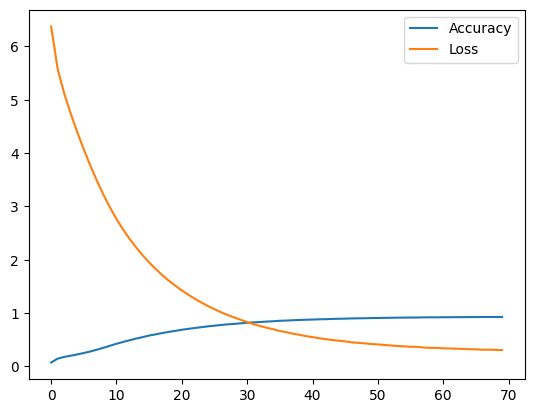

In [13]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**2-Bidirectional LSTM**

In [14]:
Bidirectional_LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [15]:
Bidirectional_LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [16]:
with tf.device('cpu:0'):
    history = Bidirectional_LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
2060/2060 [==============================] - 170s 82ms/step - loss: 6.2841 - accuracy: 0.0879
Epoch 2/150
2060/2060 [==============================] - 160s 78ms/step - loss: 5.4491 - accuracy: 0.1560
Epoch 3/150
2060/2060 [==============================] - 161s 78ms/step - loss: 5.0005 - accuracy: 0.1844
Epoch 4/150
2060/2060 [==============================] - 163s 79ms/step - loss: 4.6293 - accuracy: 0.2080
Epoch 5/150
2060/2060 [==============================] - 160s 78ms/step - loss: 4.2903 - accuracy: 0.2314
Epoch 6/150
2060/2060 [==============================] - 158s 77ms/step - loss: 3.9771 - accuracy: 0.2569
Epoch 7/150
2060/2060 [==============================] - 162s 78ms/step - loss: 3.6764 - accuracy: 0.2892
Epoch 8/150
2060/2060 [==============================] - 159s 77ms/step - loss: 3.3961 - accuracy: 0.3245
Epoch 9/150
2060/2060 [==============================] - 159s 77ms/step - loss: 3.1369 - accuracy: 0.3637
Epoch 10/150
2060/2060 [======================

In [17]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

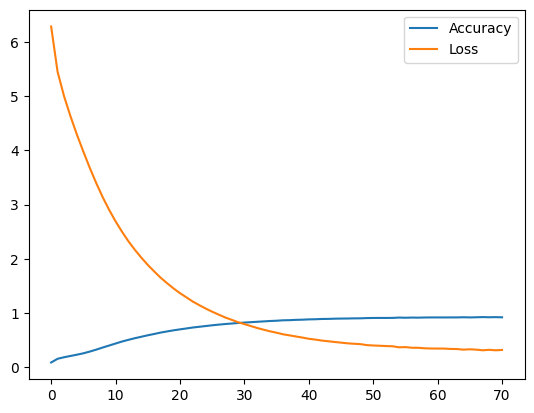

In [18]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**3-GRU**

In [19]:
GRU = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.GRU(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [20]:
GRU.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [21]:
with tf.device('cpu:0'):
    history = GRU.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
2060/2060 [==============================] - 140s 68ms/step - loss: 6.2120 - accuracy: 0.0976
Epoch 2/150
2060/2060 [==============================] - 141s 68ms/step - loss: 5.3401 - accuracy: 0.1641
Epoch 3/150
2060/2060 [==============================] - 155s 75ms/step - loss: 4.8465 - accuracy: 0.1964
Epoch 4/150
2060/2060 [==============================] - 144s 70ms/step - loss: 4.4031 - accuracy: 0.2262
Epoch 5/150
2060/2060 [==============================] - 143s 70ms/step - loss: 3.9956 - accuracy: 0.2568
Epoch 6/150
2060/2060 [==============================] - 135s 66ms/step - loss: 3.6238 - accuracy: 0.2974
Epoch 7/150
2060/2060 [==============================] - 135s 65ms/step - loss: 3.2786 - accuracy: 0.3439
Epoch 8/150
2060/2060 [==============================] - 141s 68ms/step - loss: 2.9708 - accuracy: 0.3897
Epoch 9/150
2060/2060 [==============================] - 133s 64ms/step - loss: 2.6989 - accuracy: 0.4352
Epoch 10/150
2060/2060 [======================

In [22]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

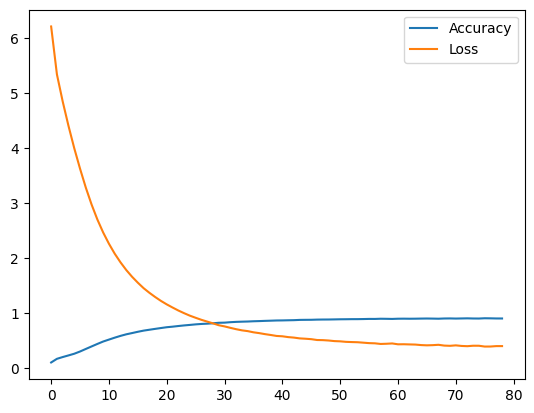

In [23]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

# Generating Text

**1-LSTM**

In [24]:
text = ""
number_of_words = 12
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

 are
 are not
 are not in
 are not in my
 are not in my future
 are not in my future but
 are not in my future but i
 are not in my future but i must
 are not in my future but i must have
 are not in my future but i must have courage
 are not in my future but i must have courage for
 are not in my future but i must have courage for healthy
 
Full Generated Text:  are not in my future but i must have courage for healthy


**2-Bidirectional LSTM**

In [25]:
text = ""
number_of_words = 12
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = Bidirectional_LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word
    print(text)
print(" ")
print("Full Generated Text:", text) 

 i
 i do
 i do not
 i do not know
 i do not know what
 i do not know what i
 i do not know what i m
 i do not know what i m going
 i do not know what i m going to
 i do not know what i m going to wear
 i do not know what i m going to wear it
 i do not know what i m going to wear it helps
 
Full Generated Text:  i do not know what i m going to wear it helps


**3-GRU**

In [26]:
text = ""
number_of_words = 10
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = GRU.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

 the
 the most
 the most basic
 the most basic task
 the most basic task of
 the most basic task of our
 the most basic task of our intelligence
 the most basic task of our intelligence by
 the most basic task of our intelligence by the
 the most basic task of our intelligence by the critic
 
Full Generated Text:  the most basic task of our intelligence by the critic


# Save The Models

In [27]:
LSTM.save('English_LSTM.h5')

In [28]:
Bidirectional_LSTM.save('English_Bidirectional_LSTM.h5')

In [29]:
GRU.save('English_GRU.h5')

In [30]:
text = "courage"
number_of_words = 12
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

courage is
courage is a
courage is a peculiar
courage is a peculiar kind
courage is a peculiar kind of
courage is a peculiar kind of fear
courage is a peculiar kind of fear not
courage is a peculiar kind of fear not more
courage is a peculiar kind of fear not more than
courage is a peculiar kind of fear not more than that
courage is a peculiar kind of fear not more than that truth
courage is a peculiar kind of fear not more than that truth other
 
Full Generated Text: courage is a peculiar kind of fear not more than that truth other
